In [1]:
## STANDARD PYTHON LIBS
import os
import re
import sys
import cv2
import PIL
import math
import time
import random
import scipy.misc
import skimage.io
import skimage.transform
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## ADDING TO ROOT
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '../'))
sys.path.append(ROOT_DIR)

## CUSTOM LIBS
import src.utils as utils
import src.model as modellib
from src.config import Config
import src.visualize as visualize

# GPU LIBS
import keras
import tensorflow as tf

print ('TF : ', tf.__version__, '  Keras : ', keras.__version__)

# if utils.check_gpu(verbose=0):
#     pass
# else:
#     sys.exit(1)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TF :  1.6.0   Keras :  2.1.4


Using TensorFlow backend.


In [55]:
if 'src.mapillary' in sys.modules : del sys.modules['src.mapillary']
import src.mapillary as mapillary
if __name__ == "__main__":
    url_dataset = '/home/play/GOD_DATASET/open_datasets/mapillary'
    mapillary_mapper = '/home/play/playment/production/Mask_RCNN/demo/raw/merge__cityscapes_mapillary_v2.json'
    mapillary_config = mapillary.MapillaryConfig()
    
    trainData = mapillary.MapillaryDataset(url_dataset, mapillary_mapper, mapillary_config, data_type = 'train')
    valData   = mapillary.MapillaryDataset(url_dataset, mapillary_mapper, mapillary_config, data_type = 'val')

Mode : train has 18000 images
Mode : val has 2000 images


In [3]:
# idx, show = 1200, True
# img = trainData.load_image(idx, show=show)
# masks, class_ids = trainData.load_mask(idx, show=show, verbose=True)

In [4]:
# idx, show = 1200, True
# img = valData.load_image(idx, show=show)
# masks, class_ids = valData.load_mask(idx, show=show, verbose=True)

# TRAINING

In [56]:
if 'src.model' in sys.modules : del sys.modules['src.model']
import src.model as modellib
    
MODEL_DIR = os.path.join(ROOT_DIR, 'demo', 'model', 'logs')
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'demo', 'model', "mask_rcnn_coco.h5")
model = modellib.MaskRCNN(mode="training", config=mapillary_config, model_dir=MODEL_DIR)

# init_with = "coco"  # imagenet, coco, or last
init_with = "last"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    model_path = model.find_last()[1]
    print (' - Path : ', model_path)
    model.load_weights(model_path, by_name=True)

 - Path :  /home/play/playment/production/Mask_RCNN/demo/model/logs/mapillary20180315T0317/mask_rcnn_mapillary_0002.h5


In [ ]:
model.train(trainData, valData, 
            learning_rate=mapillary_config.LEARNING_RATE, 
            epochs=4, 
            layers='heads')


Starting at epoch 3. LR=0.001

Checkpoint Path: /home/play/playment/production/Mask_RCNN/demo/model/logs/mapillary20180315T0317/mask_rcnn_mapillary_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:98: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:2095: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 4/4
  62/2250 [..............................] - ETA: 7:19:25 - loss: 2.7385 - rpn_class_loss: 0.1105 - rpn_bbox_loss: 1.2092 - mrcnn_class_loss: 0.5047 - mrcnn_bbox_loss: 0.4703 - mrcnn_mask_loss: 0.4438

ERROR:root:Error processing image {'id': 2459, 'source': 'mapillary', 'path': '/home/play/GOD_DATASET/open_datasets/mapillary/mapillary-vistas-dataset_public_v1.0/training/images/r3NcrADNnJY64uDBQxt8wg.jpg'}
Traceback (most recent call last):
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1645, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1230, in load_image_gt
    mask = utils.minimize_mask(bbox, mask, config.MINI_MASK_SHAPE)
  File "/home/play/playment/production/Mask_RCNN/src/utils.py", line 476, in minimize_mask
    raise Exception("Invalid bounding box with area of zero")
Exception: Invalid bounding box with area of zero


 137/2250 [>.............................] - ETA: 6:58:47 - loss: 2.5440 - rpn_class_loss: 0.1067 - rpn_bbox_loss: 1.1598 - mrcnn_class_loss: 0.4571 - mrcnn_bbox_loss: 0.4291 - mrcnn_mask_loss: 0.3913

ERROR:root:Error processing image {'id': 12488, 'source': 'mapillary', 'path': '/home/play/GOD_DATASET/open_datasets/mapillary/mapillary-vistas-dataset_public_v1.0/training/images/uVBl4XFCQez2XWui0LSvnQ.jpg'}
Traceback (most recent call last):
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1645, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1230, in load_image_gt
    mask = utils.minimize_mask(bbox, mask, config.MINI_MASK_SHAPE)
  File "/home/play/playment/production/Mask_RCNN/src/utils.py", line 476, in minimize_mask
    raise Exception("Invalid bounding box with area of zero")
Exception: Invalid bounding box with area of zero


 166/2250 [=>............................] - ETA: 6:52:46 - loss: 2.5208 - rpn_class_loss: 0.1055 - rpn_bbox_loss: 1.1629 - mrcnn_class_loss: 0.4524 - mrcnn_bbox_loss: 0.4205 - mrcnn_mask_loss: 0.3795

ERROR:root:Error processing image {'id': 10711, 'source': 'mapillary', 'path': '/home/play/GOD_DATASET/open_datasets/mapillary/mapillary-vistas-dataset_public_v1.0/training/images/di_5rah7DuywYiXN35evKQ.jpg'}
Traceback (most recent call last):
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1645, in data_generator
    use_mini_mask=config.USE_MINI_MASK)
  File "/home/play/playment/production/Mask_RCNN/src/model.py", line 1230, in load_image_gt
    mask = utils.minimize_mask(bbox, mask, config.MINI_MASK_SHAPE)
  File "/home/play/playment/production/Mask_RCNN/src/utils.py", line 476, in minimize_mask
    raise Exception("Invalid bounding box with area of zero")
Exception: Invalid bounding box with area of zero


 301/2250 [===>..........................] - ETA: 6:21:16 - loss: 2.4029 - rpn_class_loss: 0.1005 - rpn_bbox_loss: 1.1260 - mrcnn_class_loss: 0.4302 - mrcnn_bbox_loss: 0.3954 - mrcnn_mask_loss: 0.3507

# INFERENCE

In [43]:
if 'src.model' in sys.modules : del sys.modules['src.model']
import src.model as modellib
class InferenceConfig(mapillary.MapillaryConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()
print (' - Batch Size : ', inference_config.BATCH_SIZE)
model = modellib.MaskRCNN(mode="inference", config=inference_config, model_dir=MODEL_DIR)
model_path = model.find_last()[1]
print (' - Model Path : ', model_path)

if model_path != None:
    model.load_weights(model_path, by_name=True)
else:
    sys.exit(1)

 - Batch Size :  1
 - Model Path :  /home/play/playment/production/Mask_RCNN/demo/model/logs/mapillary20180315T0317/mask_rcnn_mapillary_0002.h5


In [27]:
if 'src.mapillary' in sys.modules : del sys.modules['src.mapillary']
import src.mapillary as mapillary
testData = mapillary.MapillaryDataset(url_dataset, mapillary_mapper, mapillary_config, data_type = 'test')

Mode : test has 5000 images


len(images) : 1 || self.config.BATCH_SIZE : 1
 ---> Processing 1 images
 ----> image             shape: (384, 512, 3)         min:    0.00000  max:  255.00000
 ----> molded_images     shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
 ----> image_metas       shape: (1, 23)               min:    0.00000  max:  512.00000
 -----> Mask (1, 100, 28, 28, 15)


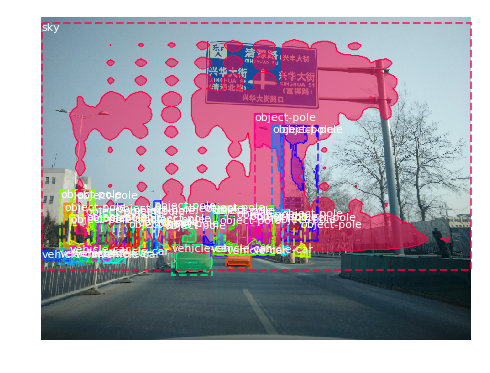

In [54]:
def get_ax(rows=1, cols=1, size=8):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

test_img = testData.load_image(45)
results  = model.detect([test_img], verbose=1)
r = results[0]

if 'src.visualize' in sys.modules : del sys.modules['src.visualize']
import src.visualize as visualize
visualize.display_instances(test_img, r['rois'], r['masks'], r['class_ids'], 
                            valData.class_names, r['scores'], ax=get_ax())

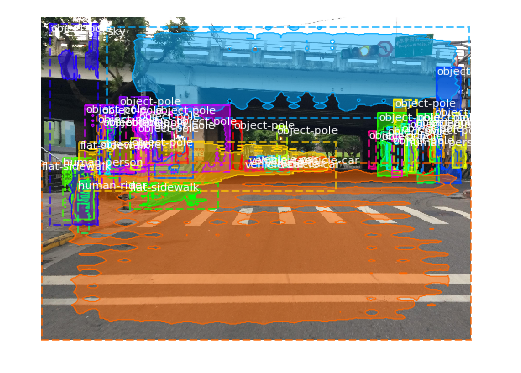

# SCRATCHPAD